# Welcome
Please note that this is not a Python tutorial. We assume that you are aware of basic Python coding and concepts including the use of ``conda`` and ``pip``. If you did not install pyfar already please do so by running the command

``pip install mesh2scattering``

After this go to your Python editor of choice and import mesh2scattering


In [1]:
# import dependencies
import mesh2scattering as m2s
import pyfar as pf
import os
import numpy as np
import matplotlib.pyplot as plt

# create the project
First we need to set the project path. Here the project will be saved. If you want to create you own project, please change the ``project_path``.

In [2]:
project_path = os.path.join(
    m2s.utils.repository_root(), 'examples', 'project')

we need to set the paths for the meshes. First for the sample and then for the reference plate. Please notice that the sample should lay on the x-y-plane where z is the hight.

In [3]:
path = os.path.join(
    m2s.utils.program_root(), '..',
    'tests', 'resources', 'mesh', 'sine_5k')
sample_path = os.path.join(path, 'sample.stl')
reference_path = os.path.join(path, 'reference.stl')

Define the frequency array. For simplicity we just use 3 frequencies. 
If you want to create 3rd- or 1st octave band frequencies have a look on ``pyfar.dsp.filter.fractional_octave_frequencies``.

In [4]:
frequencies = np.array([1250, 2500, 5000])

Now we need to define the source and receiver positions. Therefore we create a sampling grid, including the pole and removing the lower part of the grid.

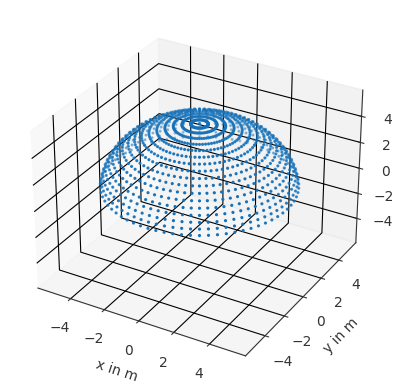

In [5]:
receiver_delta_deg = 5
receiver_radius = 5
receiverPoints = pf.samplings.sph_equal_angle(
    receiver_delta_deg, receiver_radius)
receiverPoints = receiverPoints[receiverPoints.get_sph()[..., 1] < np.pi/2]
receiverPoints.show()
plt.show()

Same for the source positions. The radius is set to 10 according to the diffusion ISO Standard 17497-2.

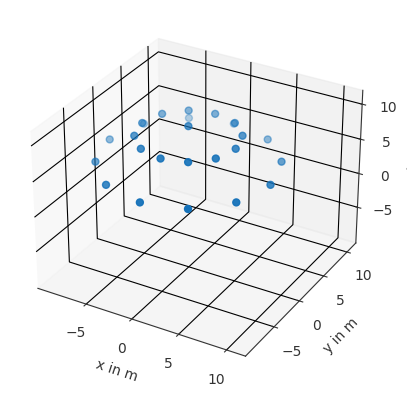

array([0.        , 0.        , 0.16666667, 0.33333333, 0.5       ,
       0.66666667, 0.83333333, 1.        , 1.16666667, 1.33333333,
       1.5       , 1.66666667, 1.83333333, 0.        , 0.16666667,
       0.33333333, 0.5       , 0.66666667, 0.83333333, 1.        ,
       1.16666667, 1.33333333, 1.5       , 1.66666667, 1.83333333])

In [6]:
source_delta_deg = 30
source_radius = 10
sourcePoints = pf.samplings.sph_equal_angle(
    source_delta_deg, source_radius)
sourcePoints = sourcePoints[sourcePoints.get_sph()[..., 1] < np.pi/2]
sourcePoints.show()
plt.show()
sourcePoints.get_sph()[..., 0] / np.pi

Now we need to set the parameters of the sample. 

In [7]:
structural_wavelength = 0
sample_diameter = 0.8
model_scale = 2.5

Furthermore we need to define the symmetry properties of the sample. In our case we have a sine-shaped surface, so the sample is symmetrical to the x-axe and y-axe, therefore we set the ``symmetry_azimuth`` to 90 and 180 degree. A rotational symmetry is not give, so we set it to ``False``.

In [8]:
symmetry_azimuth = [90, 180]
symmetry_rotational = False

This symmetry settings are required for the postprocessing and and we can speed up our simulating by skipping incident angles and calculate them in the postprocessing by mirroring the existing data. Therefore we can skip the azimuth angles grater than 90 degree for the source positions.

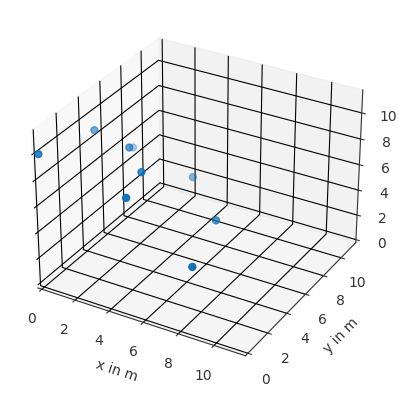

In [9]:

sourcePoints_reduced = sourcePoints[sourcePoints.get_sph()[..., 0] <= np.pi/2]
sourcePoints_reduced.show()
plt.show()

Now we can create the project. Please notice that the project was already created and simulated for demo.

In [10]:
m2s.input.write_scattering_project(
    project_path=project_path,
    frequencies=frequencies,
    sample_path=sample_path,
    reference_path=reference_path,
    receiver_coords=receiverPoints,
    source_coords=sourcePoints_reduced,
    structural_wavelength=structural_wavelength,
    model_scale=model_scale,
    sample_diameter=sample_diameter,
    symmetry_azimuth=symmetry_azimuth,
    symmetry_rotational=symmetry_rotational,
    )

# run project
To execute the project you need to build the ``NumCalc`` project. Please follow the instruction for your operation system in the readme. Then you can set the path to the numcalc executable. Usually there is no need to change it.

In [11]:
numcalc_path = os.path.join(m2s.utils.program_root(), 'numcalc', 'bin', 'NumCalc')

Now we can run the simulation, this may take some time. This example is already simulated so we don't need to wait. 

In [12]:
m2s.numcalc.manage_numcalc(project_path, numcalc_path)


Starting manage_numcalc with the following arguments [Feb 13 2023, 15:15:35]
----------------------------------------------------------------------------
project_path: /Users/anne/git/Mesh2scattering/examples/project
numcalc_path: /Users/anne/git/Mesh2scattering/mesh2scattering/numcalc/bin/NumCalc
max_ram_load: 16.0
ram_safety_factor: 1.05
max_cpu_load: 90
max_instances: 8
wait_time: 15
starting_order: alternate
confirm_errors: False

NumCalc executable: /Users/anne/git/Mesh2scattering/mesh2scattering/numcalc/bin/NumCalc

Obtaining RAM estimates for /Users/anne/git/Mesh2scattering/examples/project/sample/NumCalc/source_1
Obtaining RAM estimates for /Users/anne/git/Mesh2scattering/examples/project/sample/NumCalc/source_2
Obtaining RAM estimates for /Users/anne/git/Mesh2scattering/examples/project/sample/NumCalc/source_3
Obtaining RAM estimates for /Users/anne/git/Mesh2scattering/examples/project/sample/NumCalc/source_4
Obtaining RAM estimates for /Users/anne/git/Mesh2scattering/example

# Post processing
Now we need to create the scattering pattern sofa files out of the simulation results. Here the symmetry is also applied. <since the reference sample is always rotational symmetric, the data for the missing angles are rotated in this was sample and reference  data will have the same dimensions and coordinate

In [13]:
m2s.output.write_pattern(project_path)


 Writing the project report ...

Write sample data "grid" ...



AssertionError: Values of points_1 must be in the range                        [0.         6.28318531]